# Linear Regression Demo

使用`numpy`来实现一个简单的线性回归 demo


In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 一、生成数据集


(2,)
(10000, 2)
(10000,)


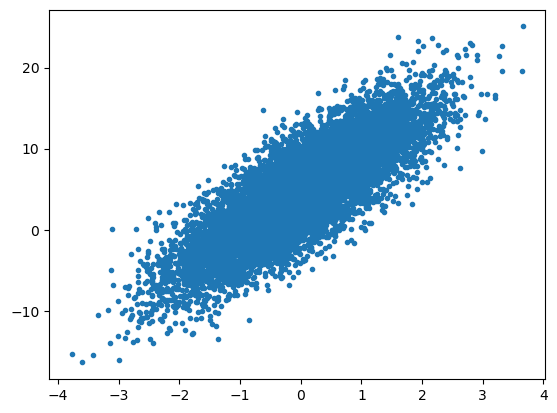

In [29]:
def generate_dataset(w, b, nums):
    x = np.random.normal(0, 1, (nums, len(w)))
    y = np.matmul(x, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return x, y


true_w = np.array([-3.2, 4.7])
true_b = 4.7

x, y = generate_dataset(true_w, true_b, 10000)

print(true_w.shape)
print(x.shape)
print(y.shape)

plt.scatter(x[:, 1], y, marker=".")
plt.show()

## 二、初始化参数


In [30]:
batch_size = 10
lr = 0.01

w = np.zeros(true_w.shape)
b = 0.0

## 三、读取数据集


In [31]:
def data_iter(batch_size, x, y):
    num_examples = len(x)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    np.random.shuffle(indices)

    batch_idx = 0
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i : min(i + batch_size, num_examples)])
        batch_idx += 1

        yield batch_idx, x[batch_indices], y[batch_indices]

## 四、梯度下降


In [32]:
def compute_gradient(x_batch, y_batch, w, b):
    m, n = x_batch.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        f_wb_i = np.dot(x_batch[i], w) + b
        err_i = f_wb_i - y_batch[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x_batch[i, j]
        dj_db = dj_db + err_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


def gradient_descent(w, b, x_batch, y_batch):
    batch_size = len(x_batch)

    for i in range(batch_size):
        dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
        w -= lr * dj_dw
        b -= lr * dj_db

    return w, b

## 五、训练模型

10 batches: loss: 4.5273674
20 batches: loss: 0.53969028
30 batches: loss: 0.067704424
40 batches: loss: 0.0053130405
50 batches: loss: 0.0022028042
60 batches: loss: 0.00029294977
70 batches: loss: 5.3458366e-05
80 batches: loss: 2.9002438e-05
90 batches: loss: 4.2621871e-05
100 batches: loss: 3.7046538e-05
110 batches: loss: 4.0963339e-05
120 batches: loss: 4.9211687e-05
130 batches: loss: 7.0325625e-05
140 batches: loss: 5.440757e-05
150 batches: loss: 3.9794816e-05
160 batches: loss: 4.3981769e-05
170 batches: loss: 8.9528474e-05
180 batches: loss: 6.1371614e-05
190 batches: loss: 2.5237786e-05
200 batches: loss: 1.5521714e-05
210 batches: loss: 4.0542475e-05
220 batches: loss: 3.2185445e-05
230 batches: loss: 4.0678757e-05
240 batches: loss: 5.2820586e-05
250 batches: loss: 3.1321389e-05
260 batches: loss: 8.2348101e-05
270 batches: loss: 7.743778e-05
280 batches: loss: 7.6727007e-05
290 batches: loss: 2.7927542e-05
300 batches: loss: 3.9747299e-05
310 batches: loss: 2.7429024e-05

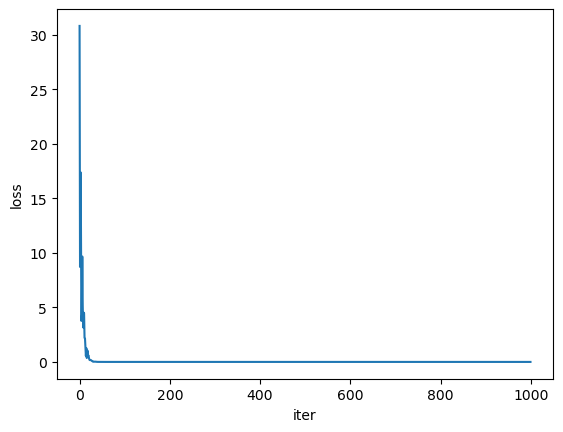

In [33]:
loss_y = []


def loss_function(x_batch, y_batch, w, b):
    m = len(x_batch)

    loss = 0

    for i in range(m):
        f_wb = np.matmul(x_batch[i], w) + b
        loss += (f_wb - y_batch[i]) ** 2

    return 1 / (2 * m) * loss


for idx, x_batch, y_batch in data_iter(batch_size, x, y):
    w, b = gradient_descent(w, b, x_batch, y_batch)
    loss = loss_function(x_batch, y_batch, w, b)

    loss_y.append(loss)

    if idx % 10 == 0:
        print(f"{idx} batches: loss:{loss: 0.8}")

plt.plot(loss_y)
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

## 六、比较参数

In [34]:
print(f"origin params: {true_w}", f"{true_b: 0.3}")
print(f"model params: {w}", f"{b: 0.3}")

origin params: [-3.2  4.7]  4.7
model params: [-3.20036159  4.69924623]  4.7
